# ARIMA

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# 获取数据
def date_parser(date):
    return pd.datetime.strptime(date, '%Y-%m')

data = pd.read_csv('dataset/AirPassengers.csv', header=0, parse_dates=['Month'], date_parser=date_parser, index_col=['Month'])
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

x = data['Passengers'].astype(np.float)
x = np.log(x)
print(x.head(10))

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: Passengers, dtype: float64


/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### diff 一阶查差分

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


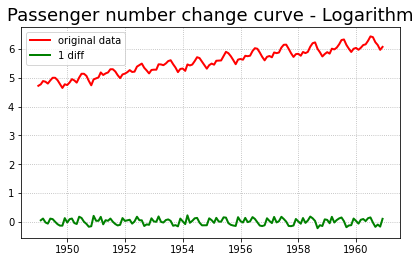

In [5]:
d = 1
diff = x - x.shift(periods=d)  # 一阶差分

plt.plot(x, 'r-', lw=2, label='original data')
plt.plot(diff, 'g-', lw=2, label='%d diff' % d)
title = 'Passenger number change curve - Logarithm'
plt.legend(loc='upper left')
plt.grid(b=True, ls=':')
plt.title(title, fontsize=18)
plt.tight_layout(2)
# plt.savefig('%s.png' % title)
plt.show()

### ma

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


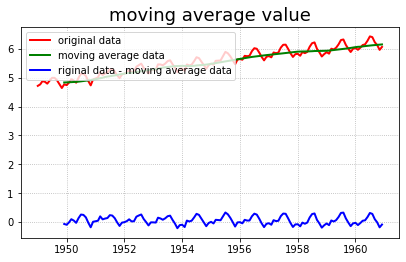

In [8]:
ma = x.rolling(window=12).mean()  # Provides rolling window calculations.
xma = x - ma
plt.plot(x, 'r-', lw=2, label='original data')
plt.plot(ma, 'g-', lw=2, label='moving average data')
plt.plot(xma, 'b-', lw=2, label='riginal data - moving average data')

title = 'moving average value'
plt.legend(loc='upper left')
plt.grid(b=True, ls=':')
plt.title(title, fontsize=18)
plt.tight_layout(2)
plt.show()

### ARIMA

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency informa

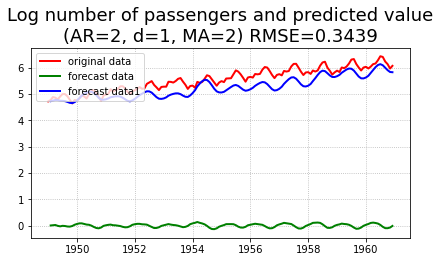

In [13]:
p = 2
q = 2
model = ARIMA(endog=x, order=(p, d, q))     # 自回归函数p,差分d,移动平均数q
arima = model.fit(disp=-1)                  # disp<0:不输出过程
prediction = arima.fittedvalues
# print(type(prediction))
y = prediction.cumsum() + x[0]
mse = ((x - y)**2).mean()
rmse = np.sqrt(mse)

plt.plot(x, 'r-', lw=2, label='original data')
plt.plot(prediction, 'g-', lw=2, label='forecast data')
plt.plot(y, 'b-', lw=2, label='forecast data1')
title = 'Log number of passengers and predicted value\n(AR=%d, d=%d, MA=%d) RMSE=%.4f' % (p, d, q, rmse)
plt.legend(loc='upper left')
plt.grid(b=True, ls=':')
plt.title(title, fontsize=18)
plt.tight_layout(2)
# plt.savefig('%s.png' % title)
plt.show()
